#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 03
**CH03D Distributions of body height and income**

height-income-distributions  dataset

version 0.9.0 2025-08-14

In [16]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [17]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/height-income-distributions/clean/"
data_out = dirname + "da_case_studies/ch03-distributions-height-income/"
output = dirname + "da_case_studies/ch03-distributions-height-income/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)


In [18]:
# Import the prewritten helper functions
import py_helper_functions as da
sns.set_theme(rc=da.da_theme, palette=da.color)


#### Load in clean and tidy data and create workfile

In [ ]:
hrs = pd.read_csv(data_in + "hrs_height_income.csv")


In [21]:
hrs.head()

,hhidpn,age,height,hhincome,female
0,3020,75,1.6256,703.50000,1
1,10001010,74,1.8034,12.00000,0
2,10003030,58,1.5494,11.88012,1
3,10004040,68,1.651,19.20000,1
4,10013010,76,1.7272,15.27600,0


In [22]:
hrs.dtypes

hhidpn        int64
age           int64
height       object
hhincome    float64
female        int64
dtype: object

In [24]:
hrs["height"] = hrs["height"].apply(pd.to_numeric, errors="coerce")  # Convert the 'height' column to numbers. If any value cannot be converted (e.g., it's text), replace it with 'NaN' (Not a Number).


In [ ]:
# filtered_women = hrs.loc[
#     (hrs["age"] >= 55)
#     & (hrs["age"] < 60)
#     & (hrs["female"] == 1)
#     & (hrs["height"] > 1.3)
#     & (hrs["height"] < 2.1)
# ]

In [25]:
filtered_women = (
    hrs
    # Look how clean this string is!
    # Pandas interprets "55 <= age < 60" natively.
    .query("55 <= age < 60 and female == 1 and 1.3 < height < 2.1")
)

In [26]:
filtered_women.head()

,hhidpn,age,height,hhincome,female
2,10003030,58,1.5494,11.880120,1
59,10769040,58,1.6256,90.120000,1
117,11620040,55,1.7018,102.380000,1
131,11802011,57,1.7018,75.126162,1
236,12549011,55,1.6002,47.400000,1


In [27]:
hrs.height.describe()


count    18660.000000
mean         1.677539
std          0.104078
min          1.003300
25%          1.600200
50%          1.676400
75%          1.752600
max          2.324100
Name: height, dtype: float64

#### Distribution of Height

In [33]:
# Statistics for density plot
mean = np.mean(filtered_women["height"])
std_dev = np.std(filtered_women["height"])
x_vals = np.linspace(min(filtered_women["height"]), max(filtered_women["height"]), 100)
x_vals

array([1.3462    , 1.35184444, 1.35748889, 1.36313333, 1.36877778,
       1.37442222, 1.38006667, 1.38571111, 1.39135556, 1.397     ,
       1.40264444, 1.40828889, 1.41393333, 1.41957778, 1.42522222,
       1.43086667, 1.43651111, 1.44215556, 1.4478    , 1.45344444,
       1.45908889, 1.46473333, 1.47037778, 1.47602222, 1.48166667,
       1.48731111, 1.49295556, 1.4986    , 1.50424444, 1.50988889,
       1.51553333, 1.52117778, 1.52682222, 1.53246667, 1.53811111,
       1.54375556, 1.5494    , 1.55504444, 1.56068889, 1.56633333,
       1.57197778, 1.57762222, 1.58326667, 1.58891111, 1.59455556,
       1.6002    , 1.60584444, 1.61148889, 1.61713333, 1.62277778,
       1.62842222, 1.63406667, 1.63971111, 1.64535556, 1.651     ,
       1.65664444, 1.66228889, 1.66793333, 1.67357778, 1.67922222,
       1.68486667, 1.69051111, 1.69615556, 1.7018    , 1.70744444,
       1.71308889, 1.71873333, 1.72437778, 1.73002222, 1.73566667,
       1.74131111, 1.74695556, 1.7526    , 1.75824444, 1.76388

In [ ]:
# # 1. CALCULATE
# # We use .agg() to run multiple functions at once.
# # This returns a clean Series with your stats.
# height_stats = filtered_women["height"].agg(["mean", "std", "min", "max"])

# # 2. THE RESULT
# # height_stats['mean'] gives you the mean, etc.
# height_stats

mean    1.628820
std     0.070975
min     1.346200
max     1.905000
Name: height, dtype: float64

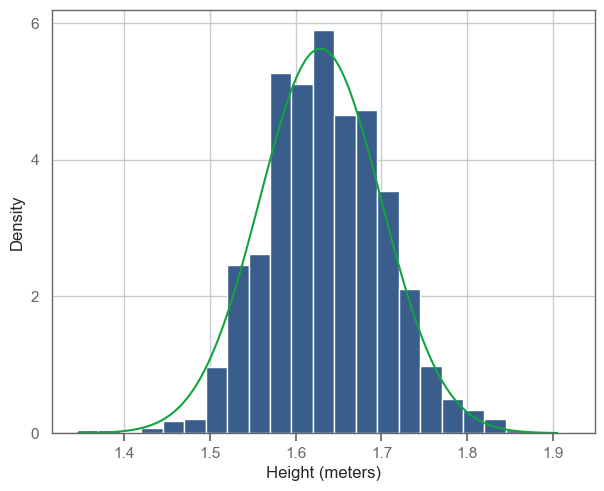

<Figure size 1000x600 with 0 Axes>

In [9]:
# Plot the histogram of the height data
sns.histplot(
    filtered_women["height"],
    bins=23, # Number of bins
    binrange=(1.345,1.92), # Range of the bins
    stat='density',  # Normalize such that the total area of the histogram equals 1
    color=da.color[0], # Set the color of the bars
    fill=True, # Fill the bars with color
    edgecolor='white',  # Set the color of the edges of the bars
    alpha=1, # Set the transparency of the bars
    element="bars", # Draw bars
)

# Plot the PDF of the normal distribution
plt.plot(x_vals, norm.pdf(x_vals, mean, std_dev), color=da.color[1])

# Set the y-axis ticks
plt.yticks(ticks=np.arange(0, 6.1, 2))

# Set the x-axis ticks
plt.xticks(ticks=np.arange(1.4, 1.95, 0.1))

# Set the x-axis label
plt.xlabel("Height (meters)")

# Set the y-axis label
plt.ylabel("Density")

#

##### LOGNORMAL: family income of women age 55-59 


In [36]:
# filter dataset
filtered_women_income = hrs.loc[
    (hrs["age"] >= 55)
    & (hrs["age"] < 60)
    & (hrs["female"] == 1)
    & (hrs["hhincome"] > 1)
    & (hrs["hhincome"] < 1000)
]
filtered_women_income.head()


,hhidpn,age,height,hhincome,female
2,10003030,58,1.5494,11.880120,1
59,10769040,58,1.6256,90.120000,1
117,11620040,55,1.7018,102.380000,1
131,11802011,57,1.7018,75.126162,1
236,12549011,55,1.6002,47.400000,1


In [35]:
filtered_women_income = (
    hrs.query("55 <= age < 60 and female == 1 and 1 < hhincome < 1000")
)
filtered_women_income.head()

,hhidpn,age,height,hhincome,female
2,10003030,58,1.5494,11.880120,1
59,10769040,58,1.6256,90.120000,1
117,11620040,55,1.7018,102.380000,1
131,11802011,57,1.7018,75.126162,1
236,12549011,55,1.6002,47.400000,1


In [11]:
filtered_women_income["hhincome"].describe()


count    1918.000000
mean       74.931920
std        87.185212
min         1.200000
25%        19.704000
50%        48.000000
75%       100.800000
max       945.000000
Name: hhincome, dtype: float64

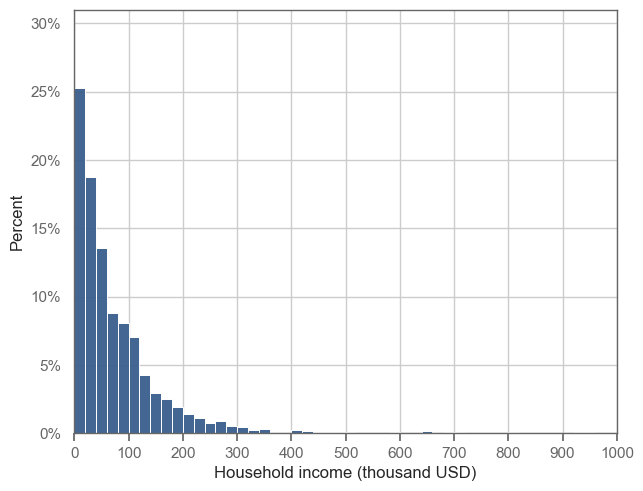

<Figure size 1000x600 with 0 Axes>

In [12]:
sns.histplot(
    filtered_women_income['hhincome'],
    binwidth=20,  
    binrange=(0,1000),
    color=da.color[0],
    fill=True,
    edgecolor='white', 
    alpha=0.95,
    stat="probability", 
    element="bars"
)


plt.xlabel("Household income (thousand USD)")
plt.ylabel("Percent")
plt.xlim(0, 1000)  
plt.xticks(np.arange(0, 1001, 100))  
plt.ylim(0, 0.31)  
plt.yticks(np.arange(0, 0.31, 0.05), labels=[f'{int(t*100)}%' for t in np.arange(0, 0.31, 0.05)]) 
plt.grid(True)
plt.figure(figsize=(10, 6))
plt.show()

In [13]:
# ln income
filtered_women_income["lnincome"] = np.log(filtered_women_income["hhincome"])


In [14]:
mean = np.mean(filtered_women_income["lnincome"])
std_dev = np.std(filtered_women_income["lnincome"])
x_vals = np.linspace(min(filtered_women_income["lnincome"]), max(filtered_women_income["lnincome"]), 100)

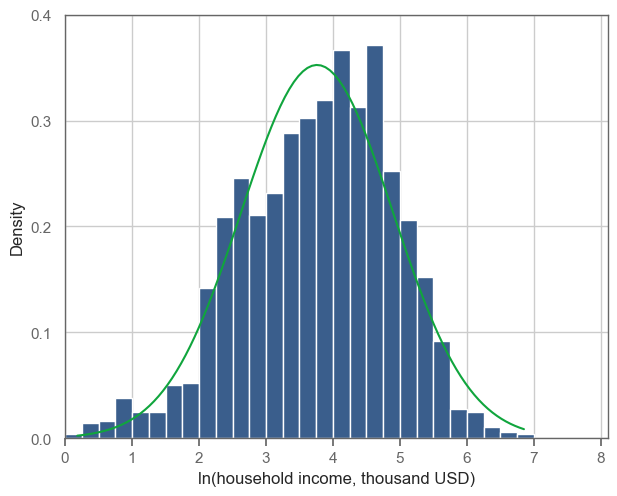

In [15]:
sns.histplot(
    filtered_women_income["lnincome"],
    binwidth=0.25,
    binrange=(0,8),
    stat='density',
    color=da.color[0],
    fill=True,
    edgecolor='white',
    alpha=1,
    #kde=False,
)


plt.plot(x_vals, norm.pdf(x_vals, mean, std_dev), color=da.color[1])
plt.xlabel("ln(household income, thousand USD)")
plt.ylabel("Density")
plt.xlim(0, 8.1)
plt.xticks(np.arange(0, 8.2, 1))
plt.ylim(0, 0.4)
plt.yticks(np.arange(0, 0.41, 0.1))
plt.margins(x=0.01, y=0.01)
plt.show()